# Principal Component Analysis (PCA) Example - Health
- https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/pca/PCA.ipynb

### 0. Data Example

In [1]:
import numpy as np
import pandas as pd

# Eating, exercise habbit and their body shape
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [2]:
df.head(10)

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200.0,1.0,0.0,0.0,2.0,Skinny
1,2800.0,1.0,1.0,1.0,1.0,Normal
2,3500.0,2.0,2.0,1.0,0.0,Fat
3,1400.0,0.0,1.0,0.0,3.0,Skinny
4,5000.0,2.0,2.0,2.0,0.0,Fat
5,1300.0,0.0,0.0,1.0,2.0,Skinny
6,3000.0,1.0,0.0,1.0,1.0,Normal
7,4000.0,2.0,2.0,2.0,0.0,Fat
8,2600.0,0.0,2.0,0.0,0.0,Normal
9,3000.0,1.0,2.0,1.0,1.0,Fat


## 1. Implement step-by-step PCA manually (6 step)

### 1) Take the whole dataset consisting of $𝑑$-dimensional samples ignoring the class labels
- For the data samples, we assume that they are organized such that each row corresponds to each sample, so that we have to transpose our dataset.

$$\mathbf{x_{k}} = \begin{bmatrix}
x_{1, k} \\
x_{2, k} \\
x_{3, k} \\
x_{4, k} \\
x_{5, k}
\end{bmatrix}$$
<br/>
<br/>
$$X = 
\begin{bmatrix}
    \mathbf{x_{1}} & \mathbf{x_{2}} & \cdots & \mathbf{x_{10}}    
  \end{bmatrix}
=
\begin{bmatrix}
    x_{1,1} & x_{1,2} & \cdots & x_{1,10} \\
    x_{2,1} & x_{2,2} & \cdots & x_{2,10} \\
    x_{3,1} & x_{3,2} & \cdots & x_{3,10} \\    
    x_{4,1} & x_{4,2} & \cdots & x_{4,10} \\
    x_{5,1} & x_{5,2} & \cdots & x_{5,10}        
  \end{bmatrix}$$
<br/>
<br/>
$$\mathbf{x_{k}^T} = \begin{bmatrix}
x_{1, k}, 
x_{2, k},
x_{3, k},
x_{4, k},
x_{5, k}
\end{bmatrix}$$
<br/>
$$X^T = 
\begin{bmatrix}
    \mathbf{x_{1}^T} \\ 
    \mathbf{x_{2}^T} \\ 
    \vdots \\
    \mathbf{x_{10}^T}    
  \end{bmatrix}
=
\begin{bmatrix}
    x_{1,1} & x_{2,1} & x_{3,1} & x_{4,1} & x_{5,1} \\
    x_{1,2} & x_{2,2} & x_{3,2} & x_{4,2} & x_{5,2} \\
    \vdots & \vdots & \vdots\\
    x_{1,10} & x_{2,10} & x_{3,10} & x_{4,10} & x_{5,10}   
  \end{bmatrix}$$

In [3]:
# X is feature vectors
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]
X.head(10)

,calory,breakfast,lunch,dinner,exercise
0,1200.0,1.0,0.0,0.0,2.0
1,2800.0,1.0,1.0,1.0,1.0
2,3500.0,2.0,2.0,1.0,0.0
3,1400.0,0.0,1.0,0.0,3.0
4,5000.0,2.0,2.0,2.0,0.0
5,1300.0,0.0,0.0,1.0,2.0
6,3000.0,1.0,0.0,1.0,1.0
7,4000.0,2.0,2.0,2.0,0.0
8,2600.0,0.0,2.0,0.0,0.0
9,3000.0,1.0,2.0,1.0,1.0


In [4]:
Y = df[['body_shape']]
Y.head(10)

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


### 2) Compute the $𝑑$-dimensional zero-mean vector

- Rescaling feature vectors to all have the same scale
  - Mean: 0
  - Standard Deviation: 1

In [5]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)
print(type(x_std))
print(x_std.shape)
x_std

<class 'numpy.ndarray'>
(10, 5)


array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

### 3) Compute the covariance matrix of the whole data set

In [6]:
# features are columns from x_std
assert x_std.shape == (10, 5)
assert x_std.T.shape == (5, 10)
cov_mat = np.cov(x_std.T)
print(cov_mat)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


### 4) Compute eigenvectors and corresponding eigenvalues  for the matrix

In [7]:
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)
print('{} \n\n {}'.format(eig_val_cov, eig_vec_cov))
print()
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(5, 1)
    print('Eigenvalue {}: {}'.format(i+1, eig_val_cov[i]))
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print(40 * '-')

[ 4.0657343   0.8387565   0.07629538  0.27758568  0.2971837 ] 

 [[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]

Eigenvalue 1: 4.065734295237528
Eigenvector 1: 
[[-0.508005  ]
 [-0.44660335]
 [-0.38377913]
 [-0.42845209]
 [ 0.46002038]]
----------------------------------------
Eigenvalue 2: 0.8387565031508384
Eigenvector 2: 
[[-0.0169937 ]
 [-0.36890361]
 [ 0.70804084]
 [-0.53194699]
 [-0.2816592 ]]
----------------------------------------
Eigenvalue 3: 0.07629537742750041
Eigenvector 3: 
[[-0.84711404]
 [ 0.12808055]
 [ 0.20681005]
 [ 0.3694462 ]
 [-0.29450345]]
----------------------------------------
Eigenvalue 4: 0.2775856843103438
Eigenvector 4: 
[[ 0.11637853]
 [-0.63112016]
 [-0.40305226]
 [ 0.22228235]
 [-0.613418

- Checking the eigenvector-eigenvalue calculation
$$\pmb\Sigma\pmb{v} = \lambda\pmb{v}$$
where
$$\pmb\Sigma = Covariance \; matrix\\
\pmb{v} = \; Eigenvector\\
\lambda = \; Eigenvalue$$

- the eigenvectors have all the same unit length 1

In [8]:
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(5, 1)
    np.testing.assert_array_almost_equal(np.matmul(cov_mat, eigvec_cov), eig_val_cov[i] * eigvec_cov)
    print('{}\n:\n{}'.format(np.matmul(cov_mat, eigvec_cov), eig_val_cov[i] * eigvec_cov))
    print('Uint length Check: {}'.format(np.linalg.norm(eigvec_cov)))
    print()

[[-2.06541336]
 [-1.81577055]
 [-1.56034399]
 [-1.74197237]
 [ 1.87032062]]
:
[[-2.06541336]
 [-1.81577055]
 [-1.56034399]
 [-1.74197237]
 [ 1.87032062]]
Uint length Check: 0.9999999999999999

[[-0.01425358]
 [-0.3094203 ]
 [ 0.59387386]
 [-0.446174  ]
 [-0.23624349]]
:
[[-0.01425358]
 [-0.3094203 ]
 [ 0.59387386]
 [-0.446174  ]
 [-0.23624349]]
Uint length Check: 0.9999999999999999

[[-0.06463089]
 [ 0.00977195]
 [ 0.01577865]
 [ 0.02818704]
 [-0.02246925]]
:
[[-0.06463089]
 [ 0.00977195]
 [ 0.01577865]
 [ 0.02818704]
 [-0.02246925]]
Uint length Check: 1.0

[[ 0.03230501]
 [-0.17518992]
 [-0.11188154]
 [ 0.0617024 ]
 [-0.17027632]]
:
[[ 0.03230501]
 [-0.17518992]
 [-0.11188154]
 [ 0.0617024 ]
 [-0.17027632]]
Uint length Check: 1.0

[[ 0.03044642]
 [-0.14851405]
 [ 0.1136199 ]
 [ 0.17520265]
 [ 0.14740858]]
:
[[ 0.03044642]
 [-0.14851405]
 [ 0.1136199 ]
 [ 0.17520265]
 [ 0.14740858]]
Uint length Check: 0.9999999999999999



### 5) Sorting the eigenvectors by decreasing eigenvalues and choose $𝑘$ eigenvectors with the largest eigenvalues to form a $𝑑×𝑘$ dimensional matrix $P$

- Sorting the eigenvectors by decreasing eigenvalues

In [9]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:, i]) for i in range(len(eig_val_cov))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

4.06573429524
0.838756503151
0.297183695429
0.27758568431
0.0762953774275


- Choosing $k$ eigenvectors with the largest eigenvalues
  - $k=1$: we are reducing a 5-dimensional feature space to a 1-dimensional feature subspace
  - We combine the one eigenvector to construct our $k×d$-dimensional (i.e., $1×5$-dimensional) eigenvector matrix $P$.

In [10]:
matrix_p = np.array((eig_pairs[0][1]))
print('Matrix P:\n', matrix_p)

Matrix P:
 [-0.508005   -0.44660335 -0.38377913 -0.42845209  0.46002038]


### 6) Use this $P$ matrix to transform the samples onto the new subspace
- we use the $1×5$-dimensional matrix $P$ that we just computed to transform our samples onto the new subspace via the equation $y=P×x$.

In [11]:
print("Matrix P's Shape: ", matrix_p.shape)
print("Matrix X's Shape: ", x_std.shape)

transformed = np.matmul(matrix_p.reshape(1, 5), x_std.T)
assert transformed.shape == (1, 10)
print(transformed)

Matrix P's Shape:  (5,)
Matrix X's Shape:  (10, 5)
[[ 2.22600943  0.0181432  -1.76296611  2.73542407 -3.02711544  2.14702579
   0.37142473 -2.59239883  0.39347815 -0.50902498]]


In [12]:
result = pd.DataFrame(transformed.reshape(10,), columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y
result.head(10)

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


- Visualize the transformed $1×10$-dimensional (i.e., $1×10$-dimensional) samples in the new subspace.

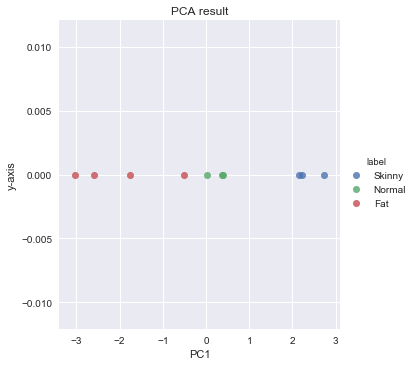

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

# title
plt.title('PCA result')

## 2. Using the PCA class from the sklearn.decomposition library to confirm our results
- [Reference] http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [14]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)
print(pca.explained_variance_ratio_)

[ 0.73183217]


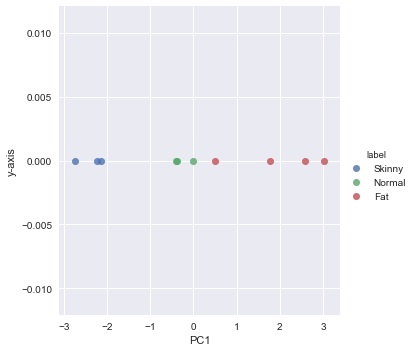

In [15]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

- The plot above seems to be the mirror image of the plot from out step by step approach. 
- This is due to the fact that the signs of the eigenvectors can be either positive or negative, since the eigenvectors are scaled to the unit length 1, both we can simply multiply the transformed data by $×(−1)$ to revert the mirror image

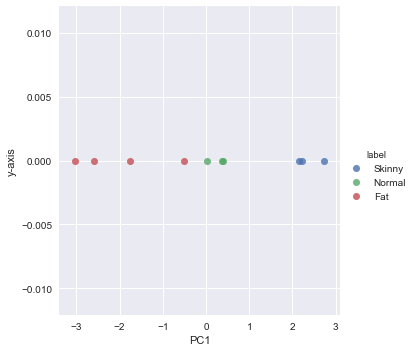

In [16]:
# sklearn.decomposition.PCA
sklearn_pca_x = sklearn_pca_x * (-1)

sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color